In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
import datetime as dt
from collections import Counter


In [74]:

round2 = pd.read_json("round_2/for_analysis/round2_merged.json")
# round3.drop(["Unnamed: 0", "Unnamed: 0.1"],axis=1, inplace=True)
print round2.columns
# round3.head()
print len(round2)
round2_clean = round2[["id", "host_id", "host_response_rate", "host_acceptance_rate", 
                       "host_total_listings_count", "monthly_price", "instant_bookable", 
                       "room_type", "bucket_name", "discount_asked", "nightly_price", 
                       "decision", "price_agreed", "discount_agreed", "percent_agreed",
                       "calendars", "price_requested", "number_of_reviews", "host_is_superhost"
                      ,"beds"]]
round2_clean["room_type"].head(5)



Index([u'Unnamed: 0', u'account', u'actions', u'availability', u'beds',
       u'bucket_name', u'calendars', u'decision', u'discount_agreed',
       u'discount_asked', u'discount_obtained', u'host_acceptance_rate',
       u'host_id', u'host_is_superhost', u'host_name', u'host_response_rate',
       u'host_response_time', u'host_total_listings_count', u'host_url', u'id',
       u'instant_bookable', u'listing_url', u'minimum_nights',
       u'monthly_price', u'nightly_price', u'nightly_price_scraped',
       u'number_of_reviews', u'openings', u'percent_agreed', u'price_agreed',
       u'price_requested', u'response', u'room_type'],
      dtype='object')
226


0         Private room
1      Entire home/apt
10     Entire home/apt
100       Private room
101       Private room
Name: room_type, dtype: object

In [75]:
round3 = pd.read_json("round_3/for_analysis/round3_merged.json")
print round3.columns

round3_clean = round3[["id", "host_id", "host_response_rate", "host_acceptance_rate", 
                       "host_total_listings_count", "monthly_price", "instant_bookable", 
                       "room_type", "bucket_name", "discount_asked", "nightly_price", 
                       "decision", "price_agreed", "discount_agreed", "percent_agreed",
                       "calendars", "price_requested", "number_of_reviews", "host_is_superhost"
                      ,"beds"]]

print len(round3_clean)
dataframes= [round2_clean, round3_clean]

round3_clean = pd.concat(dataframes)
print len(round3_clean)


Index([u'Unnamed: 0', u'account', u'actions', u'availability', u'beds',
       u'bucket_name', u'calendars', u'decision', u'discount_agreed',
       u'discount_asked', u'discount_obtained', u'extra_people',
       u'guests_included', u'host_acceptance_rate', u'host_id',
       u'host_is_superhost', u'host_name', u'host_response_rate',
       u'host_response_time', u'host_total_listings_count', u'host_url', u'id',
       u'instant_bookable', u'listing_url', u'minimum_nights',
       u'monthly_price', u'nightly_plus_guest_price', u'nightly_price',
       u'nightly_price_scraped', u'number_of_reviews', u'openings',
       u'percent_agreed', u'price_agreed', u'price_requested', u'response',
       u'room_type'],
      dtype='object')
288
514


### One method for buckets division. It's commented, since below is used another method

In [76]:
'''
opening_attr = round3_clean["bucket_name"].values
# orphan = []
# advance = []
N = len(opening_attr)
orp_1 = np.zeros(N)
orp_2 = np.zeros(N)
orp_3 = np.zeros(N)
adv_1 = np.zeros(N)
adv_2 = np.zeros(N)

for (i,x) in enumerate(opening_attr):
    if x == "days1_weeks1":
        orp_1[i] = 1
        orp_2[i] = 0
        orp_3[i] = 0
        adv_1[i] = 1
        adv_2[i] = 0
    elif x == "days1_weeks2":
        orp_1[i] = 1
        orp_2[i] = 0
        orp_3[i] = 0
        adv_1[i] = 0
        adv_2[i] = 1
    elif x == "days1_weeksM":
        orp_1[i] = 1
        orp_2[i] = 0
        orp_3[i] = 0
        adv_1[i] = 0
        adv_2[i] = 0
    elif x == "days2_weeks1":
        orp_1[i] = 0
        orp_2[i] = 1
        orp_3[i] = 0
        adv_1[i] = 1
        adv_2[i] = 0
    elif x == "days2_weeks2":
        orp_1[i] = 0
        orp_2[i] = 1
        orp_3[i] = 0
        adv_1[i] = 0
        adv_2[i] = 1
    elif x == "days2_weeksM":
        orp_1[i] = 0
        orp_2[i] = 1
        orp_3[i] = 0
        adv_1[i] = 0
        adv_2[i] = 0
    elif x == "days3_weeks1":
        orp_1[i] = 0
        orp_2[i] = 0
        orp_3[i] = 1
        adv_1[i] = 1
        adv_2[i] = 0
    elif x == "days3_weeks2":
        orp_1[i] = 0
        orp_2[i] = 0
        orp_3[i] = 1
        adv_1[i] = 0
        adv_2[i] = 1
    elif x == "days3_weeksM":
        orp_1[i] = 0
        orp_2[i] = 0
        orp_3[i] = 1
        adv_1[i] = 0
        adv_2[i] = 0
    elif x == "daysM_weeks1":
        orp_1[i] = 0
        orp_2[i] = 0
        orp_3[i] = 0
        adv_1[i] = 1
        adv_2[i] = 0
    elif x == "daysM_weeks2":
        orp_1[i] = 0
        orp_2[i] = 0
        orp_3[i] = 0
        adv_1[i] = 0
        adv_2[i] = 1
    elif x == "daysM_weeksM":
        orp_1[i] = 0
        orp_2[i] = 0
        orp_3[i] = 0
        adv_1[i] = 0
        adv_2[i] = 0
        
round3_clean["orp_1"]=orp_1
round3_clean["orp_2"]=orp_2
round3_clean["orp_3"]=orp_3
round3_clean["adv_1"]=adv_1
round3_clean["adv_2"]=adv_2
'''

'\nopening_attr = round3_clean["bucket_name"].values\n# orphan = []\n# advance = []\nN = len(opening_attr)\norp_1 = np.zeros(N)\norp_2 = np.zeros(N)\norp_3 = np.zeros(N)\nadv_1 = np.zeros(N)\nadv_2 = np.zeros(N)\n\nfor (i,x) in enumerate(opening_attr):\n    if x == "days1_weeks1":\n        orp_1[i] = 1\n        orp_2[i] = 0\n        orp_3[i] = 0\n        adv_1[i] = 1\n        adv_2[i] = 0\n    elif x == "days1_weeks2":\n        orp_1[i] = 1\n        orp_2[i] = 0\n        orp_3[i] = 0\n        adv_1[i] = 0\n        adv_2[i] = 1\n    elif x == "days1_weeksM":\n        orp_1[i] = 1\n        orp_2[i] = 0\n        orp_3[i] = 0\n        adv_1[i] = 0\n        adv_2[i] = 0\n    elif x == "days2_weeks1":\n        orp_1[i] = 0\n        orp_2[i] = 1\n        orp_3[i] = 0\n        adv_1[i] = 1\n        adv_2[i] = 0\n    elif x == "days2_weeks2":\n        orp_1[i] = 0\n        orp_2[i] = 1\n        orp_3[i] = 0\n        adv_1[i] = 0\n        adv_2[i] = 1\n    elif x == "days2_weeksM":\n        orp_

In [77]:
'''
round3_clean["orp_1, adv_1"] = round3_clean["orp_1"]*round3_clean["adv_1"]
round3_clean["orp_1, adv_2"] = round3_clean["orp_1"]*round3_clean["adv_2"]
round3_clean["orp_2, adv_1"] = round3_clean["orp_2"]*round3_clean["adv_1"]
round3_clean["orp_2, adv_2"] = round3_clean["orp_2"]*round3_clean["adv_2"]
round3_clean["orp_3, adv_1"] = round3_clean["orp_3"]*round3_clean["adv_1"]
round3_clean["orp_3, adv_2"] = round3_clean["orp_3"]*round3_clean["adv_2"]
'''

'\nround3_clean["orp_1, adv_1"] = round3_clean["orp_1"]*round3_clean["adv_1"]\nround3_clean["orp_1, adv_2"] = round3_clean["orp_1"]*round3_clean["adv_2"]\nround3_clean["orp_2, adv_1"] = round3_clean["orp_2"]*round3_clean["adv_1"]\nround3_clean["orp_2, adv_2"] = round3_clean["orp_2"]*round3_clean["adv_2"]\nround3_clean["orp_3, adv_1"] = round3_clean["orp_3"]*round3_clean["adv_1"]\nround3_clean["orp_3, adv_2"] = round3_clean["orp_3"]*round3_clean["adv_2"]\n'

In [78]:
round3_clean.head()


,id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,monthly_price,instant_bookable,room_type,bucket_name,discount_asked,nightly_price,decision,price_agreed,discount_agreed,percent_agreed,calendars,price_requested,number_of_reviews,host_is_superhost,beds
0,1450685,2071641,100%,91%,2,"$1,200.00",t,Private room,days3_weeksM,0.8,50,-1,NaN,NaN,NaN,"{u'date': {u'24': u'2016-04-25', u'25': u'2016...",40,23,f,1
1,8516966,15728249,90%,100%,1,None,f,Entire home/apt,days3_weeks1,0.9,210,1,185,NaN,NaN,"{u'date': {u'24': u'2016-04-25', u'25': u'2016...",185,1,t,4
10,1079511,4524825,100%,None,1,None,f,Entire home/apt,daysM_weeksM,0.9,170,1,170,NaN,NaN,"{u'date': {u'24': u'2016-04-25', u'25': u'2016...",150,15,f,1
100,3394768,10657357,63%,80%,4,"$1,940.00",f,Private room,days1_weeks1,0.7,69,-1,NaN,NaN,NaN,"{u'date': {u'24': u'2016-04-25', u'25': u'2016...",45,6,f,1
101,5481237,19282453,84%,90%,3,None,f,Private room,days1_weeks1,0.8,80,-1,NaN,NaN,NaN,"{u'date': {u'24': u'2016-04-25', u'25': u'2016...",60,29,f,2


### Cleaning some fields' values for the later analysis

In [79]:
#compute price median and price_std
calendar_price =  np.array([(np.median(calendar["price_USD"].values()), np.std(calendar["price_USD"].values())) for calendar in round3_clean["calendars"].values])
calendar_median_price = calendar_price[:,0]
calendar_price_std = calendar_price[:,1]
round3_clean["price_median"]=calendar_median_price
round3_clean["price_std"]=calendar_price_std/calendar_median_price
#cleaning
for index, row in round3_clean.iterrows():
    elem = str(row["host_acceptance_rate"])
    try:
        round3_clean["host_acceptance_rate"][index]= int( elem[:-1]) 
    except:
        round3_clean["host_acceptance_rate"][index]= int(-1) 
    
    elem2 = str(row["host_response_rate"])    
    try:
        round3_clean["host_response_rate"][index]= int( elem2[:-1]) 
    except:
        round3_clean["host_response_rate"][index]= int(-1) 
    
    #not used
    elem3 = str(row["monthly_price"])
    try:
        round3_clean["monthly_price"][index]= int( elem3[1:]) 
    except:
        round3_clean["monthly_price"][index]= int(-1) 
    
    #not used
    #round3_clean["nightly_price"][index] = int(row[nightly_price])

    if row["host_is_superhost"] == "t":
        round3_clean["host_is_superhost"][index] = 1
    if row["host_is_superhost"] == "f":
        round3_clean["host_is_superhost"][index] = 0
    
    if row["room_type"]==  "Private room":
        round3_clean["room_type"][index] = 1
    elif row["room_type"]=="Entire home/apt":
        round3_clean["room_type"][index] = 0
    else:
        round3_clean["room_type"][index] = 2
        
        
print len(round3_clean)
round3_clean["room_type"].head(20)


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

514


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0      1
1      1
10     0
100    0
101    0
102    0
103    0
104    0
105    0
106    1
107    0
108    1
109    1
11     1
110    0
111    0
112    0
113    0
114    0
115    0
Name: room_type, dtype: object

### creating 3 dataframes, one for accepted listing, one for denied and one for not answered. The "not_answer" is less important, but it will be shown anyway in the distributions 

In [80]:
round3_accepted= round3_clean
round3_denied= round3_clean
round3_not_answer= round3_clean

round3_accepted= round3_accepted.loc[round3_accepted['decision']==1]
round3_denied= round3_denied.loc[round3_denied['decision']==0]
round3_not_answer= round3_not_answer.loc[round3_not_answer['decision']==-1]


print len(round3_accepted)
print len(round3_denied)
print len(round3_not_answer)
print len(round3_clean)

round3_accepted.head(3)


113
157
244
514


,id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,monthly_price,instant_bookable,room_type,bucket_name,discount_asked,...,price_agreed,discount_agreed,percent_agreed,calendars,price_requested,number_of_reviews,host_is_superhost,beds,price_median,price_std
1,8516966,15728249,100,100,1,-1,f,1,days3_weeks1,0.9,...,185,NaN,NaN,"{u'date': {u'24': u'2016-04-25', u'25': u'2016...",185,1,0,4,210,0.000000
10,1079511,4524825,-1,-1,1,-1,f,0,daysM_weeksM,0.9,...,170,NaN,NaN,"{u'date': {u'24': u'2016-04-25', u'25': u'2016...",150,15,0,1,160,0.020952
103,10451994,53848488,93,0,1,-1,f,0,daysM_weeks2,0.9,...,80,NaN,NaN,"{u'date': {u'24': u'2016-04-25', u'25': u'2016...",80,1,0,1,90,0.188228


### Comparison by variance. (normalized) It doesn't seem influential

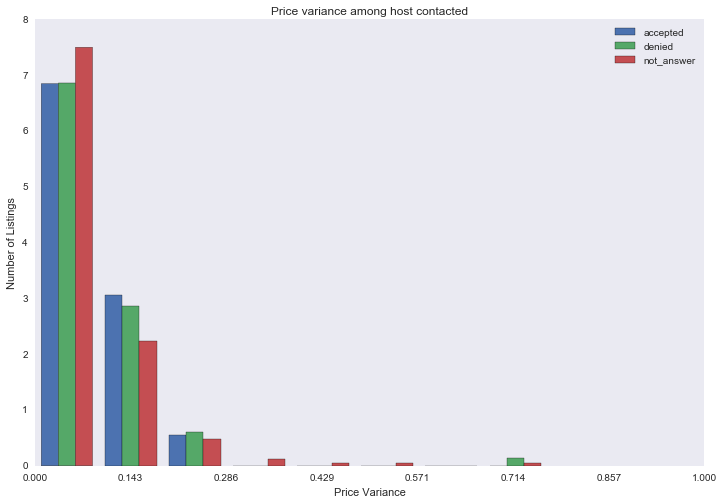

In [81]:
colors = sns.color_palette()

fig = plt.figure(figsize=[12,8], facecolor=None)


hist_multi = [round3_accepted['price_std'], 
              round3_denied['price_std'], 
              round3_not_answer['price_std']]
labels = ["accepted", "denied", "not_answer"]
plt.hist(hist_multi, bins=8, color=colors[:3], label=labels, normed= True)
plt.xlabel('Price Variance')
plt.ylabel('Number of Listings')
plt.title('Price variance among host contacted')
# plt.xlim([1./7,1])
plt.xticks(np.linspace(0,1,8))

plt.legend(loc="upper right")
plt.grid(False)



### Distribution of the accepting hosts

Percent Listings with No Price Change at All: 0.256637168142


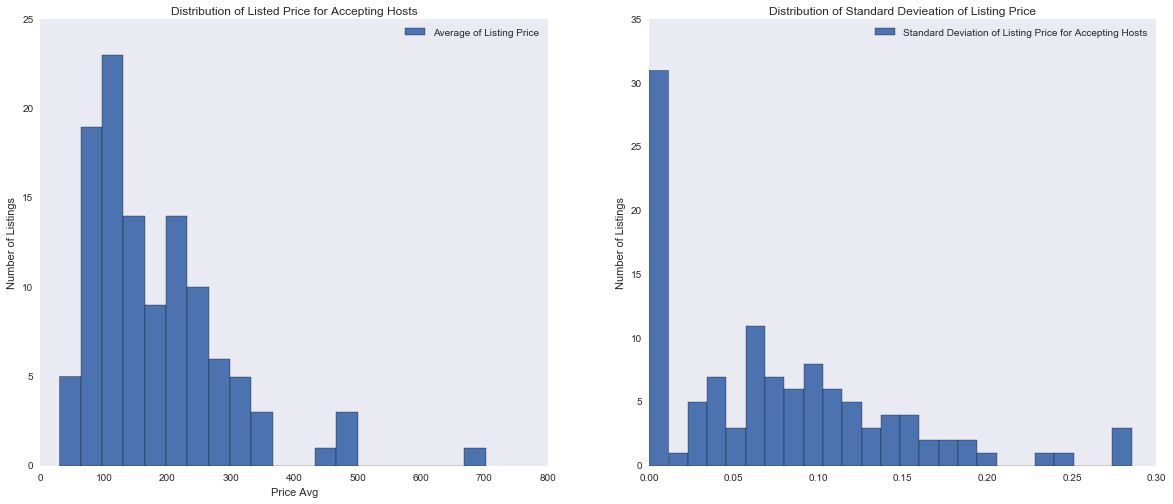

In [82]:
fig = plt.figure(figsize=[20,8])


plt.subplot(1,2,1)
plt.hist(round3_accepted['price_median'].values,bins=20, color=colors[0], label="Average of Listing Price")
plt.xlabel('Price Avg')
plt.ylabel('Number of Listings')
plt.title('Distribution of Listed Price for Accepting Hosts')
# plt.xlim([50,1400])
#plt.xticks(np.linspace(0,700,25))

plt.grid(False)
plt.legend()

plt.subplot(1,2,2)

plt.hist(round3_accepted['price_std'].values, bins=25, color=colors[0], label="Standard Deviation of Listing Price for Accepting Hosts"
        )
plt.ylabel('Number of Listings')
plt.title('Distribution of Standard Devieation of Listing Price')

plt.legend()
plt.grid(False)
print "Percent Listings with No Price Change at All:", len(round3_accepted[round3_accepted['price_std']==0])*1./len(round3_accepted)

### Distribution of the denying hosts

Percent Listings with No Price Change at All: 0.28025477707


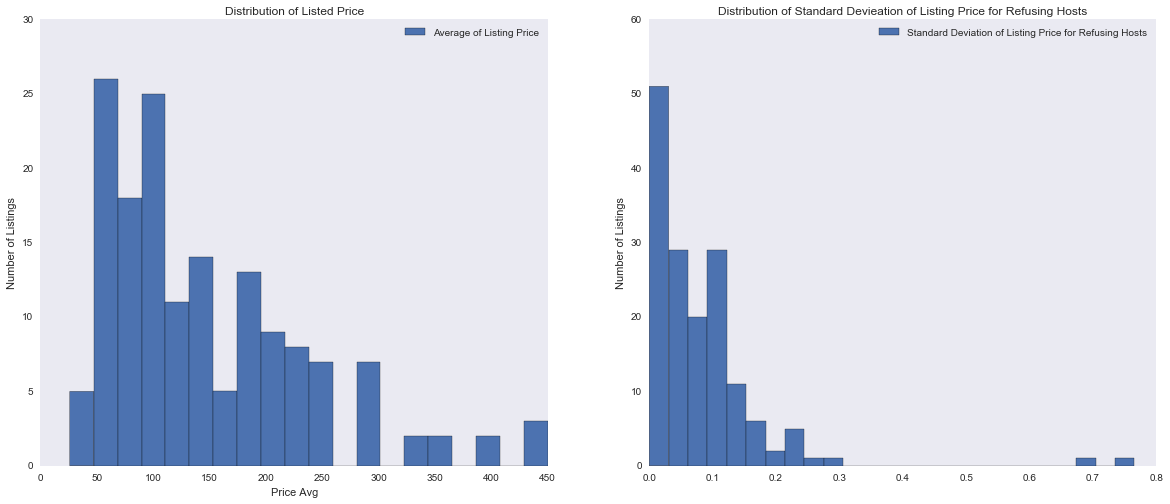

In [83]:

fig = plt.figure(figsize=[20,8])


plt.subplot(1,2,1)
plt.hist(round3_denied['price_median'].values,bins=20, color=colors[0], label="Average of Listing Price")
plt.xlabel('Price Avg')
plt.ylabel('Number of Listings')
plt.title('Distribution of Listed Price')
# plt.xlim([50,1400])
#plt.xticks(np.linspace(0,700,25))

plt.grid(False)
plt.legend()

plt.subplot(1,2,2)

plt.hist(round3_denied['price_std'].values, bins=25, color=colors[0], label="Standard Deviation of Listing Price for Refusing Hosts"
         )
plt.ylabel('Number of Listings')
plt.title('Distribution of Standard Devieation of Listing Price for Refusing Hosts')

plt.legend()
plt.grid(False)
print "Percent Listings with No Price Change at All:", len(round3_denied[round3_denied['price_std']==0])*1./len(round3_denied)

### Distribution of the non-answering hosts

Percent Listings with No Price Change at All: 0.327868852459


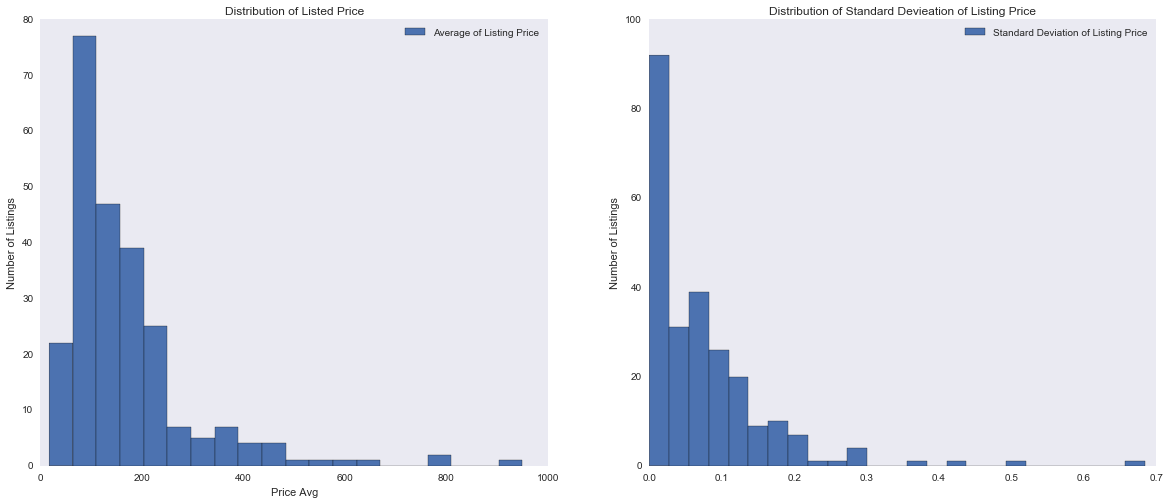

In [84]:

fig = plt.figure(figsize=[20,8])


plt.subplot(1,2,1)
plt.hist(round3_not_answer['price_median'].values,bins=20, color=colors[0], label="Average of Listing Price")
plt.xlabel('Price Avg')
plt.ylabel('Number of Listings')
plt.title('Distribution of Listed Price')

# plt.xlim([50,1400])

#plt.xticks(np.linspace(0,700,25))

plt.grid(False)
plt.legend()

plt.subplot(1,2,2)

plt.hist(round3_not_answer['price_std'].values, bins=25, color=colors[0], label="Standard Deviation of Listing Price")
plt.ylabel('Number of Listings')
plt.title('Distribution of Standard Devieation of Listing Price')

plt.legend()
plt.grid(False)
print "Percent Listings with No Price Change at All:", len(round3_not_answer[round3_not_answer['price_std']==0])*1./len(round3_not_answer)

### Superhost feature. It doesn't seem influential.

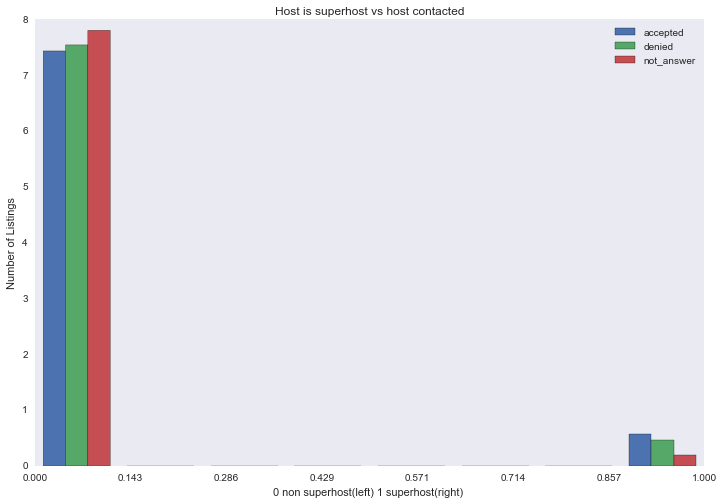

In [85]:
colors = sns.color_palette()

fig = plt.figure(figsize=[12,8], facecolor=None)


hist_multi = [round3_accepted['host_is_superhost'], 
              round3_denied['host_is_superhost'], 
              round3_not_answer['host_is_superhost']]
labels = ["accepted", "denied", "not_answer"]
plt.hist(hist_multi, bins=8, color=colors[:3], label=labels, normed= True)
plt.xlabel('0 non superhost(left) 1 superhost(right) ')
plt.ylabel('Number of Listings')
plt.title('Host is superhost vs host contacted')
# plt.xlim([1./7,1])
plt.xticks(np.linspace(0,1,8))

plt.legend(loc="upper right")
plt.grid(False)

### Acceptance rate feature. It doesn't seem influential.

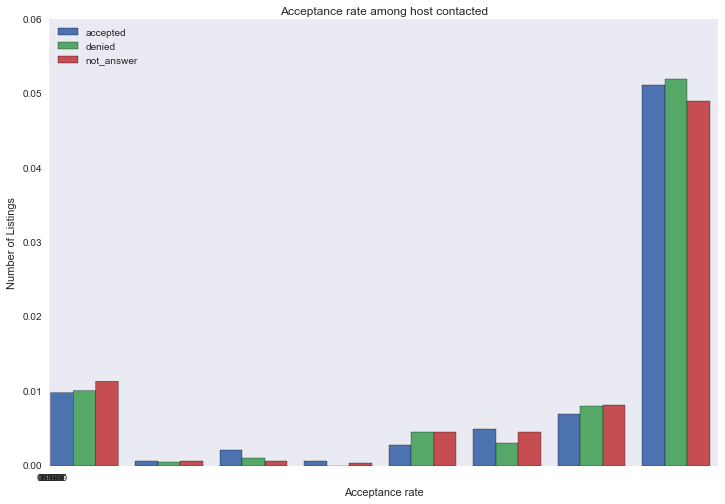

In [86]:
colors = sns.color_palette()

fig = plt.figure(figsize=[12,8], facecolor=None)


hist_multi = [round3_accepted['host_acceptance_rate'], 
              round3_denied['host_acceptance_rate'], 
              round3_not_answer['host_acceptance_rate']]
labels = ["accepted", "denied", "not_answer"]
plt.hist(hist_multi, bins=8, color=colors[:3], label=labels, normed= True)
plt.xlabel('Acceptance rate')
plt.ylabel('Number of Listings')
plt.title('Acceptance rate among host contacted')
# plt.xlim([1./7,1])
plt.xticks(np.linspace(0,1,8))

plt.legend(loc="upper left")
plt.grid(False)

### Response rate feature. It doesn't seem influential.

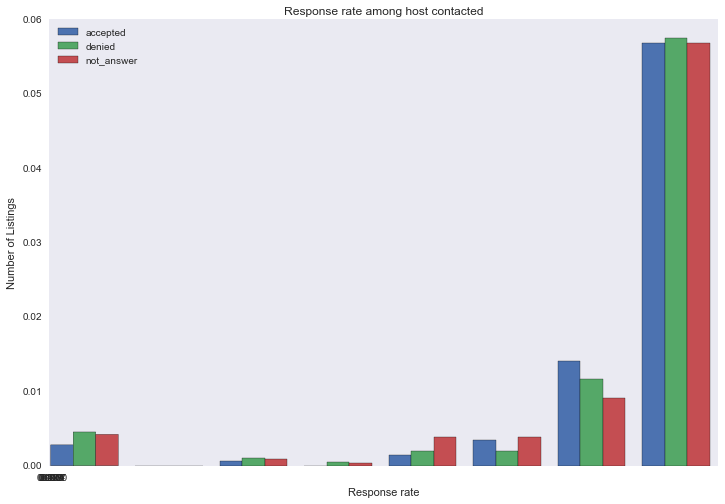

In [87]:
colors = sns.color_palette()

fig = plt.figure(figsize=[12,8], facecolor=None)


hist_multi = [round3_accepted['host_response_rate'], 
              round3_denied['host_response_rate'], 
              round3_not_answer['host_response_rate']]
labels = ["accepted", "denied", "not_answer"]
plt.hist(hist_multi, bins=8, color=colors[:3], label=labels, normed= True)
plt.xlabel('Response rate')
plt.ylabel('Number of Listings')
plt.title('Response rate among host contacted')
# plt.xlim([1./7,1])
plt.xticks(np.linspace(0,1,8))

plt.legend(loc="upper left")
plt.grid(False)

### Room type. It seems that is slightly more likely to obtain a discount in entire home

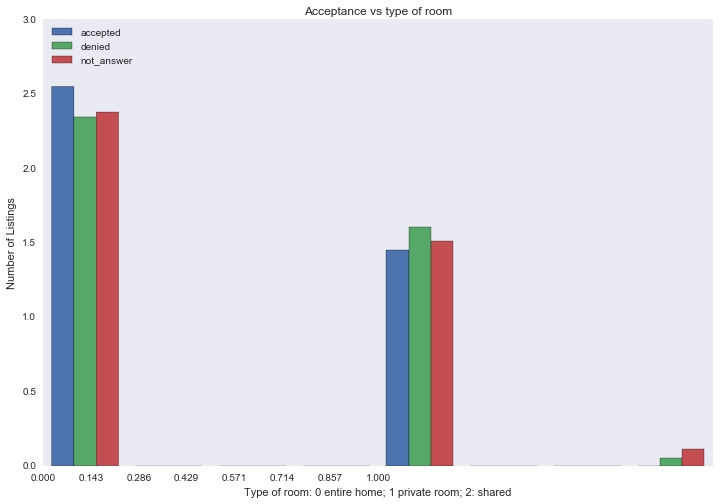

In [88]:
colors = sns.color_palette()

fig = plt.figure(figsize=[12,8], facecolor=None)


hist_multi = [round3_accepted['room_type'], 
              round3_denied['room_type'], 
              round3_not_answer['room_type']]
labels = ["accepted", "denied", "not_answer"]
plt.hist(hist_multi, bins=8, color=colors[:3], label=labels, normed= True)
plt.xlabel('Type of room: 0 entire home; 1 private room; 2: shared')
plt.ylabel('Number of Listings')
plt.title('Acceptance vs type of room')
# plt.xlim([1./7,1])
plt.xticks(np.linspace(0,1,8))

plt.legend(loc="upper left")
plt.grid(False)

### Number of additional guests. The more the guests, the highest the probability of a discount, even if there are not enough data for a strong evidence. It may be related to the type of room.

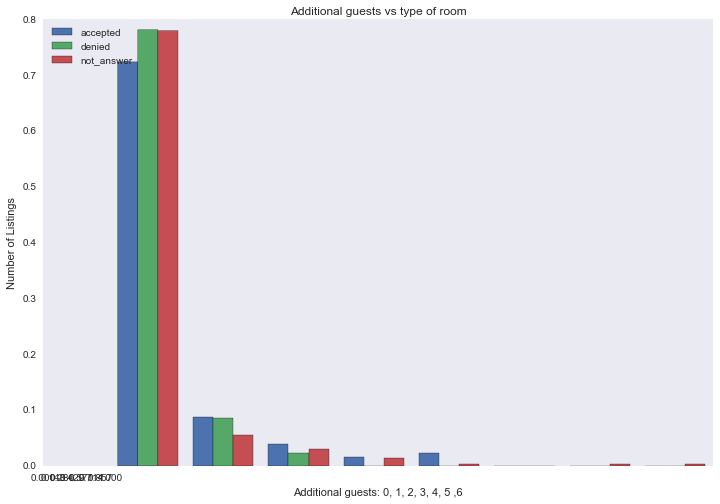

In [89]:
colors = sns.color_palette()

fig = plt.figure(figsize=[12,8], facecolor=None)


hist_multi = [round3_accepted['beds'], 
              round3_denied['beds'], 
              round3_not_answer['beds']]
labels = ["accepted", "denied", "not_answer"]
plt.hist(hist_multi, bins=8, color=colors[:3], label=labels, normed= True)
plt.xlabel('Additional guests: 0, 1, 2, 3, 4, 5 ,6')
plt.ylabel('Number of Listings')
plt.title('Additional guests vs type of room')
# plt.xlim([1./7,1])
plt.xticks(np.linspace(0,1,8))

plt.legend(loc="upper left")
plt.grid(False)

### Price median. The bigger the price, the bigger the probability of a discount. Not strongly evident.

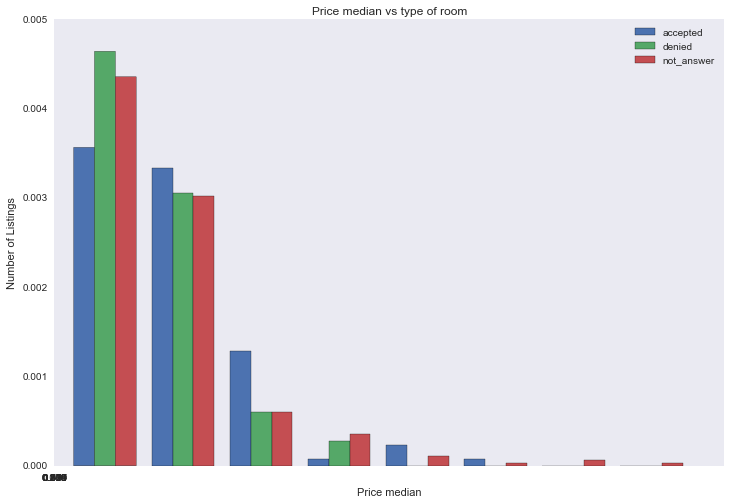

In [90]:

colors = sns.color_palette()

fig = plt.figure(figsize=[12,8], facecolor=None)


hist_multi = [round3_accepted['price_median'], 
              round3_denied['price_median'], 
              round3_not_answer['price_median']]
labels = ["accepted", "denied", "not_answer"]
plt.hist(hist_multi, bins=8, color=colors[:3], label=labels, normed= True)
plt.xlabel('Price median')
plt.ylabel('Number of Listings')
plt.title('Price median vs type of room')
# plt.xlim([1./7,1])
plt.xticks(np.linspace(0,1,8))

plt.legend(loc="upper right")
plt.grid(False)

               0
days3_weeks2   7
daysM_weeksM   6
days3_weeks1   6
days2_weeks2  13
days1_weeks1   4
days1_weeks2  13
days1_weeksM  11
days2_weeks1  11
days2_weeksM   9
daysM_weeks1   9
daysM_weeks2  11
days3_weeksM  13
Counter({u'days2_weeks2': 13, u'days1_weeks2': 13, u'days3_weeksM': 13, u'days1_weeksM': 11, u'days2_weeks1': 11, u'daysM_weeks2': 11, u'days2_weeksM': 9, u'daysM_weeks1': 9, u'days3_weeks2': 7, u'daysM_weeksM': 6, u'days3_weeks1': 6, u'days1_weeks1': 4})


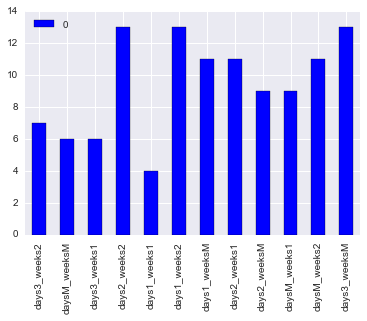

In [91]:
from collections import Counter
bucket_counts = Counter(round3_accepted['bucket_name'])
accepted_by_buckets = pd.DataFrame.from_dict(bucket_counts, orient='index')
accepted_by_buckets.plot(kind='bar')
print accepted_by_buckets

print bucket_counts

               0
days3_weeks2   9
daysM_weeksM  15
days3_weeks1  13
days2_weeks2  12
days1_weeks1  11
days1_weeks2  11
days1_weeksM  14
days2_weeks1  15
days2_weeksM  17
daysM_weeks1  13
daysM_weeks2  16
days3_weeksM  11


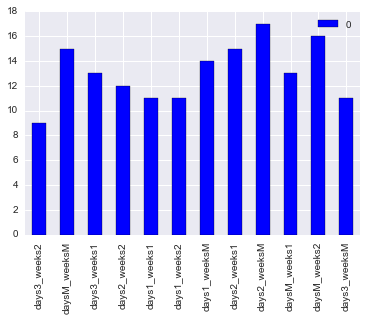

In [92]:
bucket_counts = Counter(round3_denied['bucket_name'])
denied_by_buckets = pd.DataFrame.from_dict(bucket_counts, orient='index')
denied_by_buckets.plot(kind='bar')
print denied_by_buckets


               0
days2_weeks1  16
daysM_weeksM  22
days3_weeks1  24
days2_weeks2  18
days1_weeks1  27
days1_weeks2  19
days1_weeksM  18
days2_weeksM  17
daysM_weeks1  21
daysM_weeks2  16
days3_weeksM  19
days3_weeks2  27


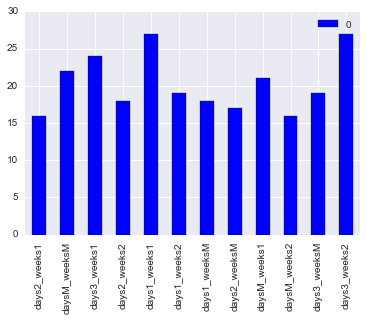

In [93]:
bucket_counts = Counter(round3_not_answer['bucket_name'])
not_answer_by_buckets = pd.DataFrame.from_dict(bucket_counts, orient='index')
not_answer_by_buckets.plot(kind='bar')
print not_answer_by_buckets

In [94]:
print accepted_by_buckets[0]["days2_weeks1"]
print denied_by_buckets[0]["days2_weeks1"]
print not_answer_by_buckets[0]["days2_weeks1"]

print accepted_by_buckets[0]["days3_weeks1"]
print denied_by_buckets[0]["days3_weeks1"]
print not_answer_by_buckets[0]["days3_weeks1"]

11
15
16
6
13
24


### Number of accepted/ acceptance rate and number of denied/denial rate of each bucket

In [95]:
#days in advance/ acceptance rate



###IMPORTANT###
#the result of study samples contains 4 elements: [number_of_studied_bucket, acceptance_rate_of_studied_bucket,
# (other_datapoints - number_of_studied_bucket), (acceptance_rate_of(other_datapoints - number_of_studied_bucket)]
                                        
def study_sample(vector_index, sample, label, values):
   
    
    positive=0
    #round2 and round3 have buckets of size 20 and 25
    bucket_size=0
    res= []
    for inde in vector_index:       
        positive = positive + values[0][inde]
        bucket_size=bucket_size+accepted_by_buckets[0][inde]
        bucket_size=bucket_size+denied_by_buckets[0][inde]
        bucket_size=bucket_size+not_answer_by_buckets[0][inde]
        #print "partial size "+ str(bucket_size)
    
    print label +": " + str(positive)
    res.append(positive)
    p_rate= float(positive) /(bucket_size)
    print label + " rate: "+ str(p_rate) 
    res.append(p_rate)
    
    #rest of data points
    negative = len(sample)-positive
    res.append(negative)
    print "others except "+ label +": " + str(negative)
    n_rate= float(negative) / (len(round3_clean)-bucket_size ) 
    res.append(n_rate)
    print "others except "+label + " rate: "+str(n_rate)
    print "\n"
    
    return res 


orp1_acc= study_sample (["days1_weeks1","days1_weeks2","days1_weeksM" ],round3_accepted, "orphan 1 accepted", accepted_by_buckets)
orp1_den= study_sample (["days1_weeks1","days1_weeks2","days1_weeksM"],round3_denied, "orphan 1 denied", denied_by_buckets)

orp2_acc= study_sample (["days2_weeks1","days2_weeks2","days2_weeksM"],round3_accepted, "orphan 2 accepted", accepted_by_buckets)
orp2_den= study_sample (["days2_weeks1","days2_weeks2","days2_weeksM"],round3_denied, "orphan 2 denied", denied_by_buckets)

orp3_acc= study_sample (["days3_weeks1","days3_weeks2","days3_weeksM"],round3_accepted, "orphan 3 accepted", accepted_by_buckets)
orp3_den= study_sample (["days3_weeks1","days3_weeks2","days3_weeksM"],round3_denied, "orphan 3 denied", denied_by_buckets)

orpM_acc= study_sample (["daysM_weeks1","daysM_weeks2","daysM_weeksM" ],round3_accepted, "non orphan accepted", accepted_by_buckets)
orpM_den= study_sample (["daysM_weeks1","daysM_weeks2","daysM_weeksM"],round3_denied, "non orphan denied", denied_by_buckets)

adv1_acc= study_sample (["days1_weeks1","days2_weeks1","days3_weeks1", "daysM_weeks1" ],round3_accepted, "adv 1 accepted", accepted_by_buckets)
adv1_den= study_sample (["days1_weeks1","days2_weeks1","days3_weeks1", "daysM_weeks1" ],round3_denied, "adv 1 denied", denied_by_buckets)

adv2_acc= study_sample (["days1_weeks2","days2_weeks2","days3_weeks2", "daysM_weeks2" ],round3_accepted, "adv 2 accepted", accepted_by_buckets)
adv2_den= study_sample (["days1_weeks2","days2_weeks2","days3_weeks2", "daysM_weeks2" ],round3_denied, "adv 2 denied", denied_by_buckets)

advM_acc= study_sample (["days1_weeksM","days2_weeksM","days3_weeksM", "daysM_weeksM" ],round3_accepted, "adv M accepted", accepted_by_buckets)
advM_den= study_sample (["days1_weeksM","days2_weeksM","days3_weeksM", "daysM_weeksM" ],round3_denied, "adv M denied", denied_by_buckets)





orphan 1 accepted: 28
orphan 1 accepted rate: 0.21875
others except orphan 1 accepted: 85
others except orphan 1 accepted rate: 0.220207253886


orphan 1 denied: 36
orphan 1 denied rate: 0.28125
others except orphan 1 denied: 121
others except orphan 1 denied rate: 0.313471502591


orphan 2 accepted: 33
orphan 2 accepted rate: 0.2578125
others except orphan 2 accepted: 80
others except orphan 2 accepted rate: 0.20725388601


orphan 2 denied: 44
orphan 2 denied rate: 0.34375
others except orphan 2 denied: 113
others except orphan 2 denied rate: 0.29274611399


orphan 3 accepted: 26
orphan 3 accepted rate: 0.201550387597
others except orphan 3 accepted: 87
others except orphan 3 accepted rate: 0.225974025974


orphan 3 denied: 33
orphan 3 denied rate: 0.255813953488
others except orphan 3 denied: 124
others except orphan 3 denied rate: 0.322077922078


non orphan accepted: 26
non orphan accepted rate: 0.201550387597
others except non orphan accepted: 87
others except non orphan accepted 

### "1 week in advance" has  lower acceptance rate than the others. The average acceptance rate of the orphan days is above the non-orphans

In [96]:
print "********length in advance*************"
print "\n"
print "**acceptance**"
print "1 w:" +str(adv1_acc[1])
print "2 w:" +str(adv2_acc[1])
print "M w:" +str(advM_acc[1])

print "**refusal**"
print "1 w:" +str(adv1_den[1])
print "2 w:" +str(adv2_den[1])
print "M w:" +str(advM_den[1])
print "\n"
print "********orphan VS non orphan*************"
print "\n"
print "**acceptance**"
print "orph 1:" +str(orp1_acc[1])
print "orph 2:" +str(orp2_acc[1])
print "orph 3:" +str(orp3_acc[1])
print "non orph:" +str(orpM_acc[1])

print "**refusal**"
print "orph 1:" +str(orp1_den[1])
print "orph 2:" +str(orp2_den[1])
print "orph 3:" +str(orp3_den[1])
print "non orph:" +str(orpM_den[1])

********length in advance*************


**acceptance**
1 w:0.176470588235
2 w:0.255813953488
M w:0.226744186047
**refusal**
1 w:0.305882352941
2 w:0.279069767442
M w:0.331395348837


********orphan VS non orphan*************


**acceptance**
orph 1:0.21875
orph 2:0.2578125
orph 3:0.201550387597
non orph:0.201550387597
**refusal**
orph 1:0.28125
orph 2:0.34375
orph 3:0.255813953488
non orph:0.341085271318
